# Example 4.3: Probability distribution of peak response
This example studies the peak responses of a single degree of freedom system subjected to a stochastic load. We assume that the mass is $m = 1kg$, the stiffness is $k=10 N/m$ and damping ratio $\zeta=0.05$. The auto-spectral density of the load is defined as

$$S_X = \frac{1}{10+\omega^2} $$

## Question 1: Calculate the probability density function of the peaks of the response

The probability distribution of all response peaks is obtained by considering the number of peaks that crosses a threshold $a$ divided by the total number of peaks. The up-crossing rate for a Gaussian stochastic process is defined by

$$v_y^+(a) = \frac{1}{2\pi} \frac{\sigma_{\dot{y}}}{\sigma_y}\exp\left[- \frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2 \right] $$

It is thus straightforward to obtain the expected number of peaks being higher than $a$. Getting the total number of peaks is more complicated. A response process for a lightly damped linear system is narrowly banded since the response is dominated by frequency content close to the natural frequency of the dynamic system. An ideal narrow banded response has one peak per zero crossing. We can then approximate the total number of peaks as the number of zero crossings. The mean zero upcrossing rate is defined as 
. 
$$v_y^+(0) = \frac{1}{2\pi} \frac{\sigma_{\dot{y}}}{\sigma_y} $$

The probability of a peak  higher than the threshold $a$ is thus

$$P\{y_p>a\} = \frac{v_y^+(a)}{v_y^+(0)}$$

We are interested in the probability distribution function, which is the probability of the response being less or equal to the threshold. This is the complement to the event above.

$$P\{y_p<a\} = 1- \frac{v_y^+(a)}{v_y^+(0)}$$

Inserting the expressions for the up-crossing rates 

$$P_a(a) = 1- \exp\left[ -\frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2 \right]$$

We are asked to obtain the probability density function, which is the derivative of the probability distribution.

$$ p_a(a) = \frac{\partial P_a(a)}{\partial a} = \frac{a}{\sigma_y^2} 
\exp\left[ -\frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2\right]$$

### Define structural properties

In [2]:
import numpy as np
from matplotlib import pyplot as plt

M =1.0
K =10.0
zeta = 0.05
C = 2*zeta*np.sqrt(K/M)*M


### Frequency response function


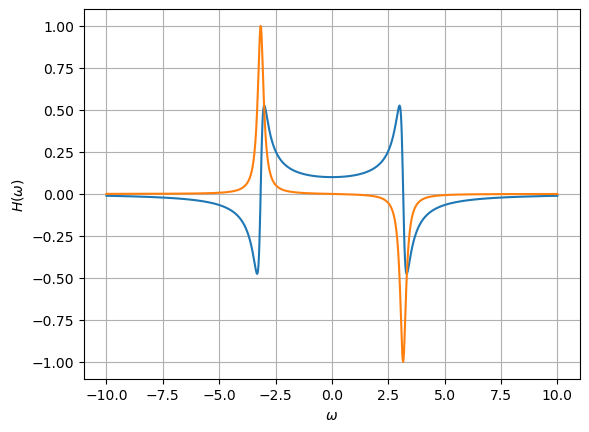

In [3]:
w = np.linspace(-10,10,1001)
H = 1/(-w**2*M + 1j*w*C+ K)

plt.figure()
plt.plot(w,np.real(H))
plt.plot(w,np.imag(H))
plt.grid()
plt.ylabel('$H(\omega)$')
plt.xlabel('$\omega$');

### Load auto-spectral density

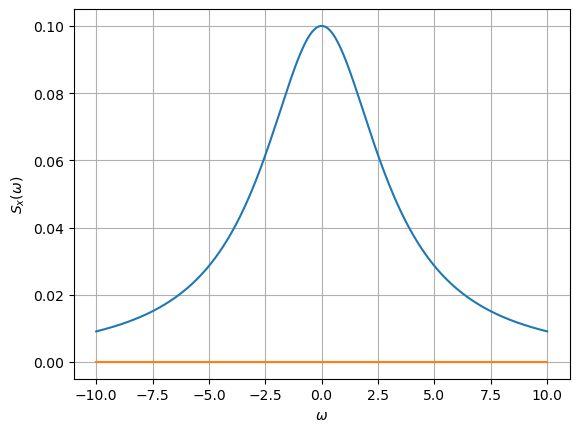

In [4]:
Sx = 1/(10.0+w**2)

plt.figure()
plt.plot(w,np.real(Sx))
plt.plot(w,np.imag(Sx))
plt.grid()
plt.ylabel('$S_x(\omega)$')
plt.xlabel('$\omega$');

### Response auto-spectral density

We find the response as $S_y(\omega)=\bar{H}(\omega) S_x(\omega) H(\omega)$.

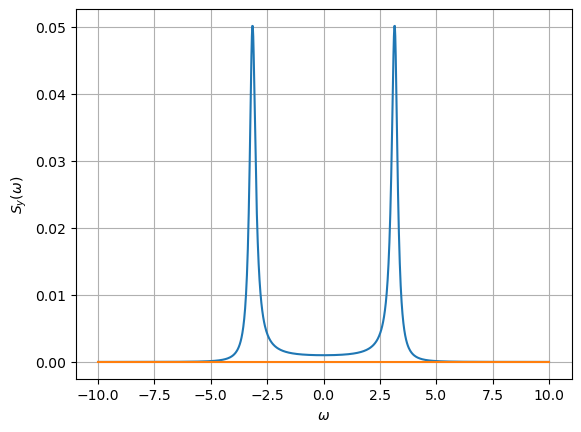

In [5]:
Sy = np.conj(H)*Sx*H

plt.figure()
plt.plot(w,np.real(Sy))
plt.plot(w,np.imag(Sy))
plt.grid()
plt.ylabel('$S_y(\omega)$')
plt.xlabel('$\omega$');

### Rayleigh distribution of peaks

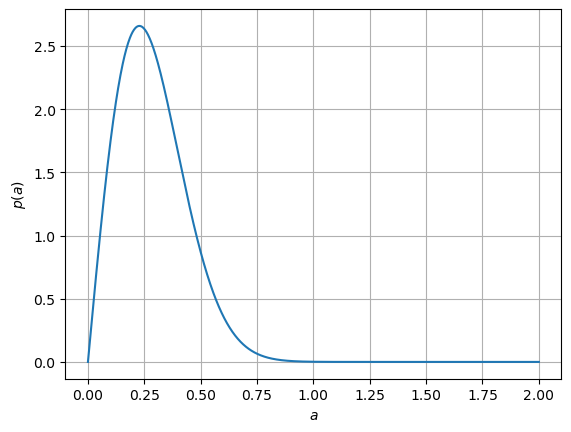

In [6]:
std_y = np.sqrt(np.real(np.trapz(Sy,w)))
a = np.linspace(0,2,1000)
pa = a/std_y**2*np.exp(-0.5*(a/std_y)**2)

plt.figure()
plt.plot(a,pa)
plt.grid()
plt.ylabel('$p(a)$')
plt.xlabel('$a$');

## Question 2: Calculate the probability density function of the largest peak for a time interval of 100 seconds
The probability distribution of the largest peak in an interval of duration $T$ follows a Poisson distribution. 

$$ P_{Ma}(a)=\text{Prob}\{ \max \{ y(t), 0 \le t \le T \} \le a \} = \exp \left[-v_y^+(a)T \right] $$

Here the up-crossing rate is defined by

$$v_y^+(a) = \frac{1}{2\pi} \frac{\sigma_{\dot{y}}}{\sigma_y}\exp\left[ -\frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2 \right] $$

The probability density function is obtained by taking the derivative of the probability distribution function. 

$$ p_{Ma}(a) = \frac{\partial P_{Ma}(a)}{\partial a} $$

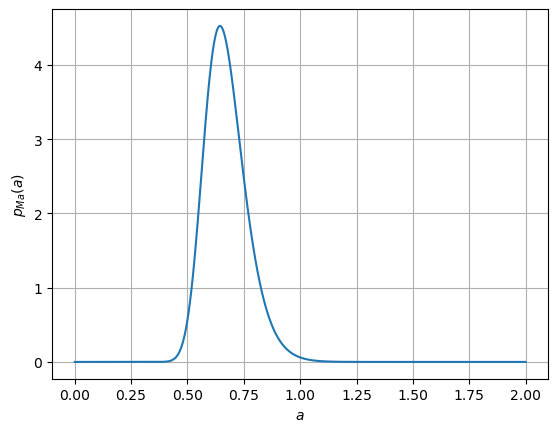

In [8]:
std_doty = np.sqrt(np.real(np.trapz(w**2*Sy,w)))
am = np.linspace(0,2,1000)
vy = 1/2/np.pi*std_doty/std_y*np.exp(-0.5*(am/std_y)**2)
T = 100.0
Pma = np.exp(-vy*T)
pma = np.zeros(am.shape[0])
pma[0:pma.shape[0]-1] = np.diff(Pma)/(am[1]-am[0])

plt.figure(100)
plt.plot(am,pma)
plt.grid()
plt.ylabel('$p_{Ma}(a)$')
plt.xlabel('$a$');

The resulting PDF can be quickly compared to the max from a time domain simulation. Remember that the simulation is just one realization and does not give the complete picture.

peak_max=0.65


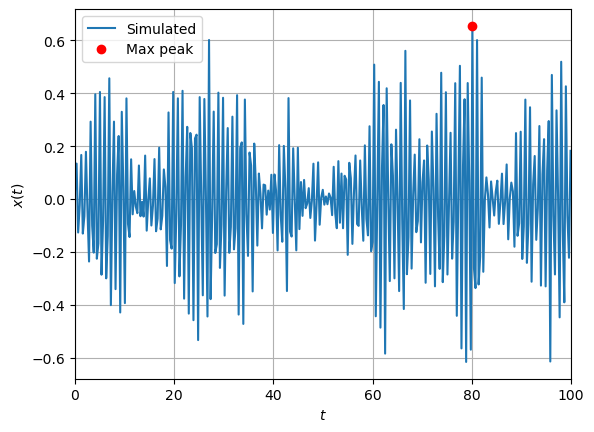

In [32]:
phi = np.random.rand(w.shape[0])*2*np.pi # Random phase angles 
domega=w[1]-w[0]
c = (2*Sy*domega)**0.5*np.exp(1j*phi) # The complex amplitude inclusing the phase angle
xifft = np.real(np.fft.ifft(c)*w.shape[0]) # The ifft
tifft = np.linspace(0,2*np.pi/domega,w.shape[0]) # time axis

xifft=xifft[tifft<T] # Cut to 100 s duration
tifft=tifft[tifft<T]

idx_max=np.argmax(xifft)

plt.figure()
plt.plot(tifft,xifft,label = 'Simulated')

plt.plot(tifft[idx_max],xifft[idx_max], 'ro',label = 'Max peak')
plt.xlim((0,100));
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.legend();

print('peak_max=' +str(round(xifft[idx_max]*100.0)/100.0))